In [1]:
include("../src/HSVGP.jl")
using .HSVGP

In [2]:
using Random, Zygote, PyPlot, LinearAlgebra, Statistics

In [3]:
import Flux

In [4]:
rng = MersenneTwister(123);
N   = 50000
X   = 2 .* rand(rng, N)
X   = reshape(X,(N,1)); # Ensure X has two dimensions as required

Y   = 3*exp.(-0.5 .* X[:,1]) .* sin.(6*X[:,1]) + 0.1 .* randn(rng, N);# .+ 10.;


In [5]:
temp_model = HSVGP.SVGP_obj(X,Y,5);

In [7]:
inds   = rand(1:N, 12);

In [17]:
@time opt_trace, p_traces = HSVGP.fit_svgp!(temp_model, n_iters=20000, batch_size=20, return_param_traces = true);

 15.992466 seconds (38.67 M allocations: 9.956 GiB, 10.48% gc time)


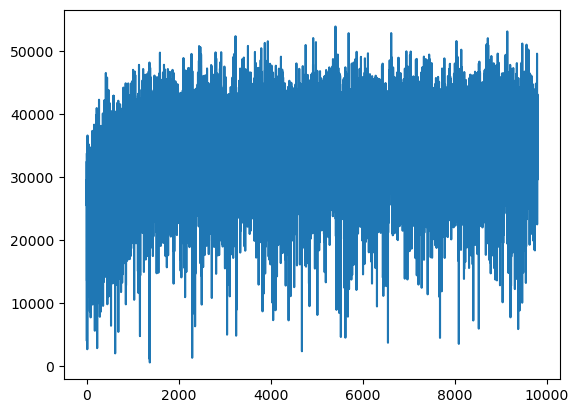

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17d1caeb0>

In [18]:
PyPlot.plot(opt_trace[200:end])

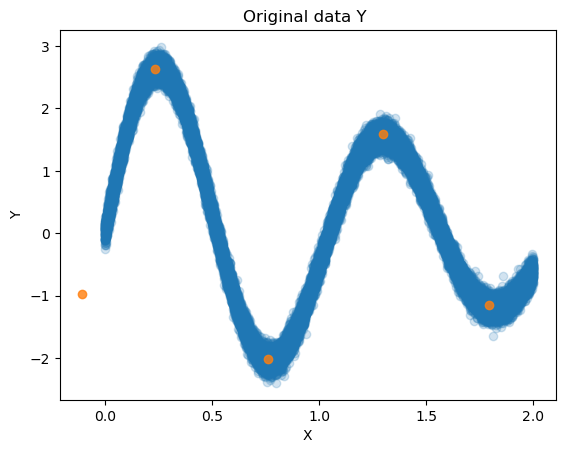

PyObject Text(0.5, 1.0, 'Original data Y ')

In [19]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, temp_model.params.inducing_mean, alpha=0.8)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")



In [20]:
pX = reshape([-0.:0.05:2.;],(41,1));

In [21]:
predY, predSD = HSVGP.pred_vgp(pX, temp_model);
err_sigma = exp(temp_model.params.log_sigma[1]);

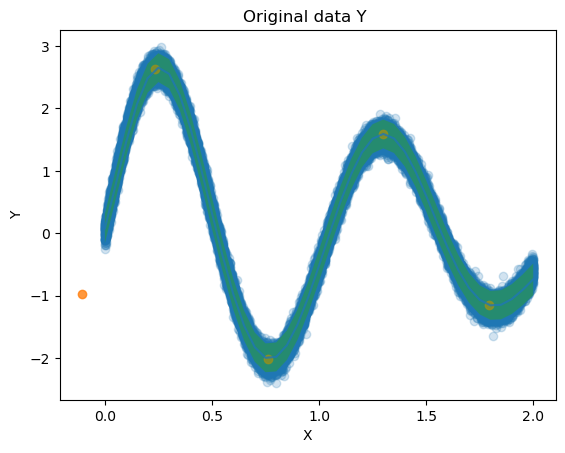

PyObject Text(0.5, 1.0, 'Original data Y ')

In [22]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, temp_model.params.inducing_mean, alpha=0.8)
PyPlot.plot(pX, predY, alpha=0.8)
PyPlot.fill_between(pX[:,1], predY + 2. .* sqrt.(predSD.^2 .+ err_sigma^2), predY - 2. .* sqrt.(predSD.^2 .+ err_sigma^2),alpha=.5)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")


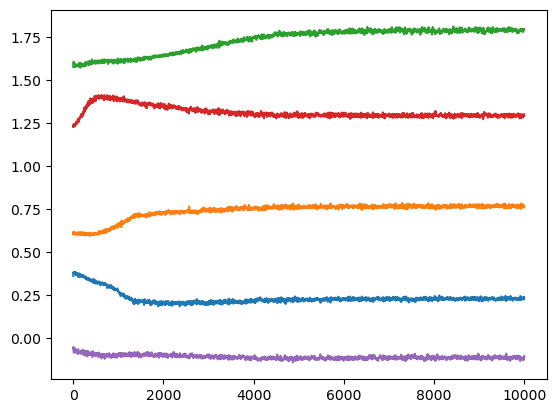

5-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1796f2940>
 PyObject <matplotlib.lines.Line2D object at 0x1796f2a30>
 PyObject <matplotlib.lines.Line2D object at 0x1796f2730>
 PyObject <matplotlib.lines.Line2D object at 0x1796f29d0>
 PyObject <matplotlib.lines.Line2D object at 0x1796f2250>

In [23]:
PyPlot.plot(p_traces["inducing_locs"][:,:,1])


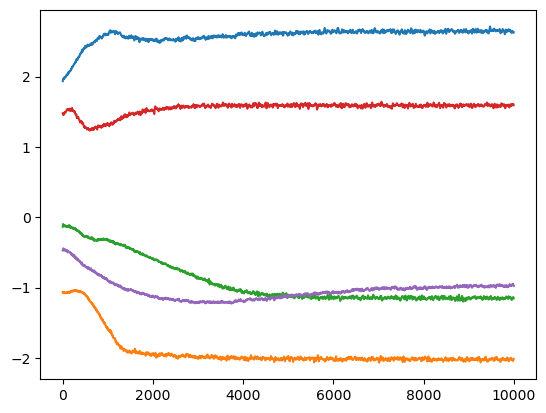

5-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1806ff4c0>
 PyObject <matplotlib.lines.Line2D object at 0x1806ff5b0>
 PyObject <matplotlib.lines.Line2D object at 0x1806ff670>
 PyObject <matplotlib.lines.Line2D object at 0x1806ff730>
 PyObject <matplotlib.lines.Line2D object at 0x1806ff7f0>

In [24]:
PyPlot.plot(p_traces["inducing_mean"])


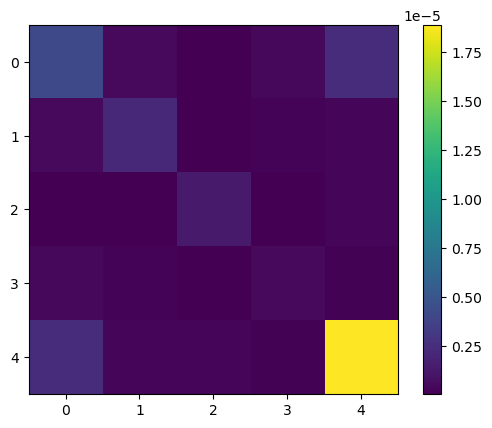

PyObject <matplotlib.colorbar.Colorbar object at 0x181026130>

In [25]:
PyPlot.imshow(abs.(temp_model.params.inducing_L * temp_model.params.inducing_L'))
PyPlot.colorbar()

In [35]:
n = 50000
X = 4 .* rand(2*n) .- 1.
X = reshape(X,(n,2))
# y = sin.(2. * x[:,2]) .* sin.(6. * x[:,1]) .* exp.( -abs.(x[:,1] .- 1)) + 0.1 .* randn(n,1);
Y = sin.(1. * X[:,2]) .* sin.(2. * X[:,1]) .* exp.( -abs.(X[:,1] .- 1)) + 0.1 .* randn(n);

ni = 30


30

In [36]:
temp_model_2D = HSVGP.SVGP_obj(X, Y, ni);

In [37]:
opt_trace2D, p_traces = HSVGP.fit_svgp!(temp_model_2D, n_iters=4000, batch_size=100, return_param_traces = true);

In [38]:
logdet(Hermitian( temp_model_2D.params.inducing_L * temp_model_2D.params.inducing_L'))

-350.50887408321574

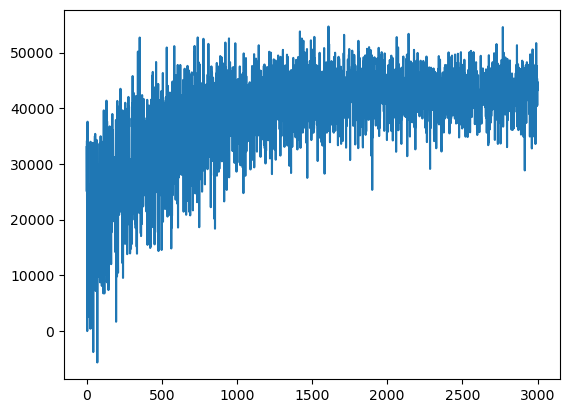

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17484d3d0>

In [39]:
PyPlot.plot(opt_trace2D[1000:end])

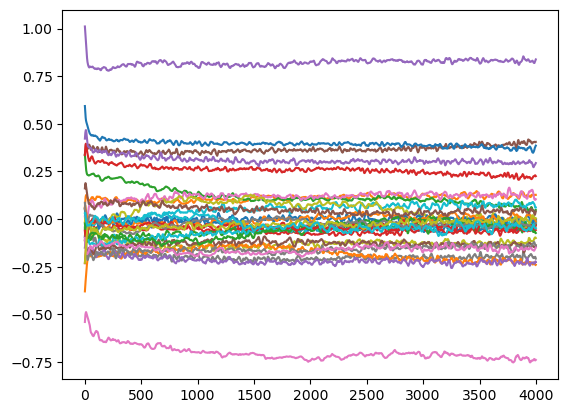

30-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1750ecb20>
 PyObject <matplotlib.lines.Line2D object at 0x1750ecc10>
 PyObject <matplotlib.lines.Line2D object at 0x1750eccd0>
 PyObject <matplotlib.lines.Line2D object at 0x1750ecd90>
 PyObject <matplotlib.lines.Line2D object at 0x1750ece50>
 PyObject <matplotlib.lines.Line2D object at 0x1750ecf10>
 PyObject <matplotlib.lines.Line2D object at 0x1750ecfd0>
 PyObject <matplotlib.lines.Line2D object at 0x1750f80d0>
 PyObject <matplotlib.lines.Line2D object at 0x1750f8190>
 PyObject <matplotlib.lines.Line2D object at 0x1750f8250>
 PyObject <matplotlib.lines.Line2D object at 0x17487ed60>
 PyObject <matplotlib.lines.Line2D object at 0x1750f83a0>
 PyObject <matplotlib.lines.Line2D object at 0x1750f8460>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x1750f88e0>
 PyObject <matplotlib.lines.Line2D object at 0x1750f89a0>
 PyObject <matplotlib.lines.Line2D object at 0x1750f8a60>
 PyObject <matplotlib.lines.Line

In [40]:
PyPlot.plot(p_traces["inducing_mean"])


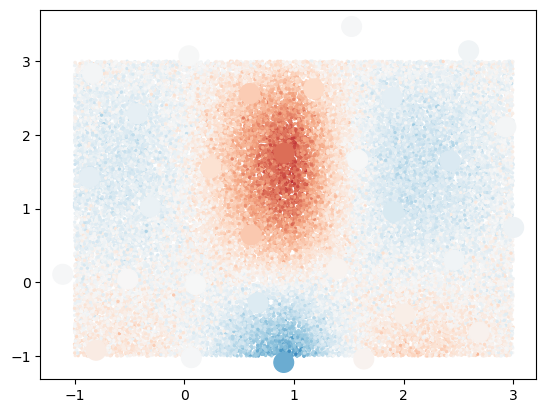

PyObject <matplotlib.collections.PathCollection object at 0x173a653d0>

In [41]:
scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], c = temp_model_2D.params.inducing_mean, s=200,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))

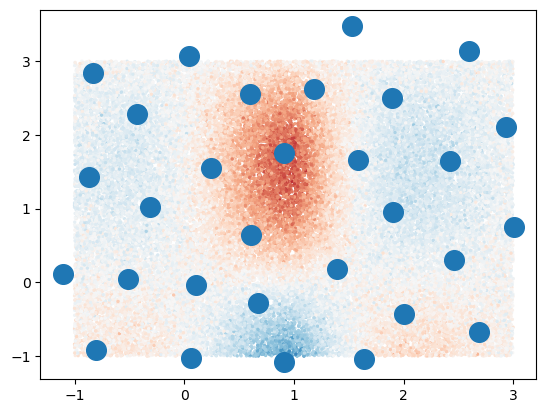

PyObject <matplotlib.collections.PathCollection object at 0x177098ca0>

In [42]:
scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], s=200,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))

In [43]:
px = hcat([[x,y] for x in collect(-1:0.05:3) for y in collect(-1:0.05:3)]...)'
pn = size(px)[1]

6561

In [44]:
p_mean, p_sd = HSVGP.pred_vgp(px, temp_model_2D);

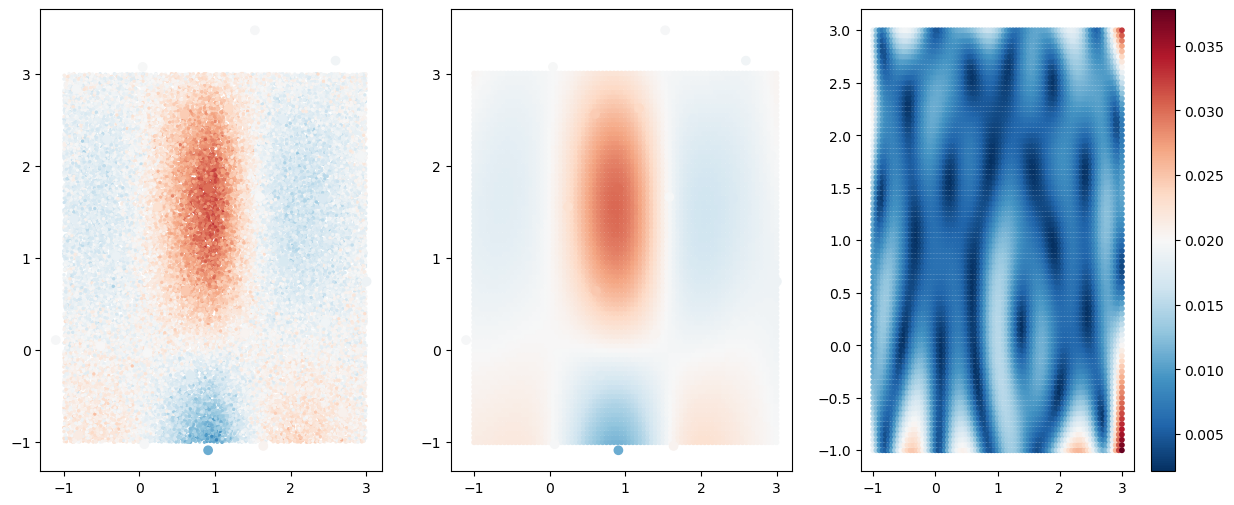

PyObject <matplotlib.colorbar.Colorbar object at 0x172465430>

In [45]:
fig = figure(figsize=(15,6))
subplot(131)
PyPlot.scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
PyPlot.scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=temp_model_2D.params.inducing_mean,
    vmin=-1.5,
    vmax=1.5,
    cmap=ColorMap("RdBu_r"))
subplot(132)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=p_mean,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=temp_model_2D.params.inducing_mean,
    vmin=-1.5,
    vmax=1.5,
    cmap=ColorMap("RdBu_r"))
subplot(133)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=p_sd,cmap=ColorMap("RdBu_r"))
PyPlot.colorbar()
